<a href="https://colab.research.google.com/github/sanjanabhakat26/DeepLearning_Sanjana/blob/main/HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on building a Handwriting Recognition Model using MNIST Dataset


This is a basic project showing how to build a handwriting recognition model using tensorflow library in Python. It also explains the work of each cell in the code.  

First of all, we import all the necessary libraries.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Next, we load the MNIST dataset from the Keras module in tensorflow. The dataset consists of 70,000 images labelled with the true outputs.

In [3]:
mnist_data=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Next, we check the shape of our training and test data. The training set contains 60,000 samples and the testing set contains 10,000 samples. Shape of x_train is (60000, 28, 28) which means that the training data has 60,000 images of width 28 pixels and height of 28 pixels.

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We now divide the inputs of training data and testing data i.e images by 255 which changes their range to 0 to 1 i.e standardizes them to have zero mean and unit variance. This step is beneficial as it improves model convergence and the gradient flow, enhances numerical stability, improves model performance and also acts as a regularization parameter to prevent overfitting.

In [5]:
x_train,x_test=x_train/255.0,x_test/255.0

Next, let's check the output array of our test dataset. This array consists of the true labels of the test dataset.

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

As an optional way to understand the data more, we transform the test dataset's output labels to one-hot encoded vectors i.e categorical data which means the index of 1 in the vector is the true label. That is,
for example : [0,0,1,0,0,0,0,0,0,0] : here 1 is present at index 3 and hence, the label is 3.

In [7]:
num_classes=10
y_test_encoded=tf.keras.utils.to_categorical(y_test,num_classes)
y_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Now, we define a function to plot 9 images from the dataset in a (3,3 grid). We adjust the spaces between each subplot to leave some margin, reshape the images, and also remove the ticks i.e the numbered axes. The function also shows the true labels with the subplots with an additional parameter of predicted labels which can be compared with the true ones once the model is trained.

In [8]:
def plot_images(images,cls_true,cls_pred=None):
     assert len (images)==len(cls_true)==9
     fig,axes=plt.subplots(3,3)
     fig.subplots_adjust(hspace=0.3,wspace=0.3)
     for i,ax in enumerate(axes.flat):
       ax.imshow(images[i].reshape(28,28),cmap='binary')
       if cls_pred is None:
        xlabel="True:{0}".format(cls_true[i])
       else:
        xlabel="True:{0},Pred:{1}".format(cls_true[i],cls_pred[i])
       ax.set_xlabel(xlabel)
       ax.set_xticks([])
       ax.set_yticks([])
     plt.show()

Next, we call the function and plot the first 9 images from the test dataset.

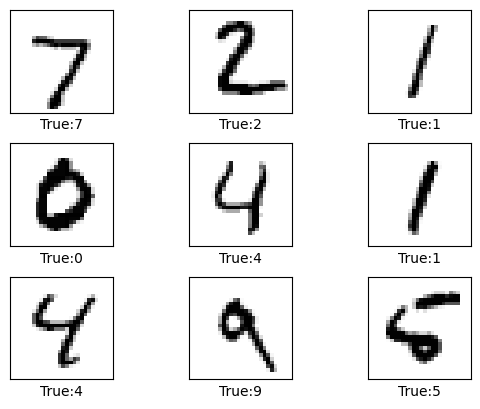

In [9]:
images=x_test[0:9]
cls_true=y_test[0:9]
plot_images(images=images,cls_true=cls_true)

 Next, we add an extra dimension to the training dataset to make the shape of the images suitable to the expected shape of CNN models i.e [batch_size,height,width, dimension]. In image data, this indicates the number of channels. Here, 1 indicates the dimension of the image i.e the image is in grayscale. For a colourful image the dimension is 3 as it contains Red, Green, Blue (RGB) layers.

In [10]:
x_train=x_train[...,tf.newaxis]
x_test=x_test[...,tf.newaxis]

The next step is to build and train our CNN model. We use the Keras module of Tensorflow to achieve this. We build a Sequential model which means that the output of previous layer is the input for the next layer in a linear stack like architecture. We perform a 2D convolution on the data of input shape as given and the layer has 32 filters each of size (3,3). We use the ReLU activation function here.

> The 2D MaxPooling allows to reduce the spatial dimensions of the input by taking maximmum value from each pooling window. This helps reduce the size of the features while preserving the most important information.

> Adding a flatten layer to the model transforms multidimensional input to a 1D vector from the previously built 2D layer. This 1D vector serves as the input to a dense connected neural network layer.

> Next, we add a fully connected dense layer to the model. Here 64 indicates the number of individual neurons whose output are put in to the ReLU activation function.

> Lastly, we add another fully connected dense layer of 10 neurons which resemble the output.

In this way, we build the CNN model which is to be trained on the training data after compiling.










In [11]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(10)])

The next step compiles the model that is configures the training process before it can be trained.
> The Adam optimizer helps adjust the learning rate of each parameter based on past gradient.

> The loss parameter specifies which loss function to be used during training to compare the predicted labels with the true ones. This helps in computing the gradients. The 'SparseCategoricalCrossentropy' loss function is suitable for multi-class classification problems where the output labels are integers.

> The accuracy is the specified evaluation metric.

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Now, we fit the training data to our trained model. With each epoch, the model refines its parameters with respect to the computed gradients.

In [13]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 44s 22ms/step - loss: 0.1708 - accuracy: 0.9499 - val_loss: 0.0643 - val_accuracy: 0.9798
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0476 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0467 - val_accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0410 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0516 - val_accuracy: 0.9843


Next, we use the model to predict the output labels of the test set and also plot the first 9 images of the test set with their true and predicted labels using the function we defined earlier.

313/313 [==============================] - 2s 6ms/step


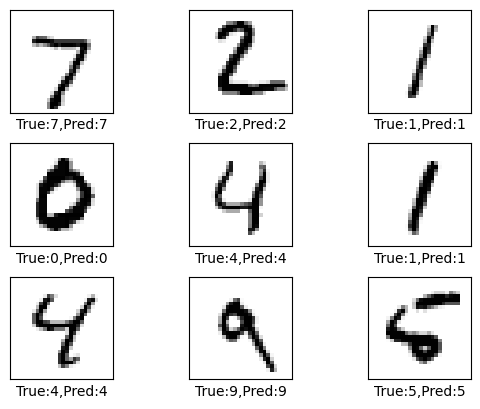

In [17]:
y_pred=model.predict(x_test)
images=x_test[0:9]
cls_pred=np.argmax(y_pred,axis=1)
true_labels=y_test[0:9]
pred_labels=cls_pred[0:9]
plot_images(images,true_labels,pred_labels)

We see the model has classified these instances correctly. Next, we find the indices of instances which were misclassified.

In [19]:
indices=np.random.randint(0,len(x_test),size=9)
misclassified_indices=np.where(cls_pred!=y_test)[0]
misclassified_indices

array([  92,  217,  259,  316,  321,  340,  445,  508,  619,  659,  674,
        689,  720,  740,  870,  882,  947,  965, 1014, 1039, 1044, 1181,
       1182, 1232, 1242, 1247, 1260, 1319, 1344, 1393, 1414, 1425, 1459,
       1522, 1527, 1530, 1609, 1678, 1709, 1722, 1737, 1790, 1878, 1901,
       1982, 2018, 2035, 2070, 2116, 2118, 2130, 2135, 2182, 2293, 2387,
       2422, 2437, 2462, 2488, 2597, 2654, 2771, 2896, 2921, 2939, 2953,
       2995, 3030, 3060, 3108, 3206, 3218, 3225, 3250, 3252, 3254, 3289,
       3330, 3422, 3503, 3520, 3558, 3559, 3599, 3681, 3694, 3726, 3727,
       3762, 3780, 3808, 3850, 3853, 3902, 3906, 4007, 4063, 4176, 4193,
       4211, 4248, 4289, 4504, 4601, 4639, 4731, 4761, 4783, 4807, 4816,
       4823, 4838, 4860, 4876, 4956, 5140, 5228, 5600, 5634, 5654, 5887,
       5936, 5937, 5955, 5982, 6011, 6071, 6166, 6172, 6391, 6555, 6571,
       6574, 6576, 6597, 6625, 6755, 6847, 7220, 7492, 7545, 8059, 8325,
       8527, 9009, 9587, 9627, 9634, 9638, 9652, 96

We plot some of the misclassified images.

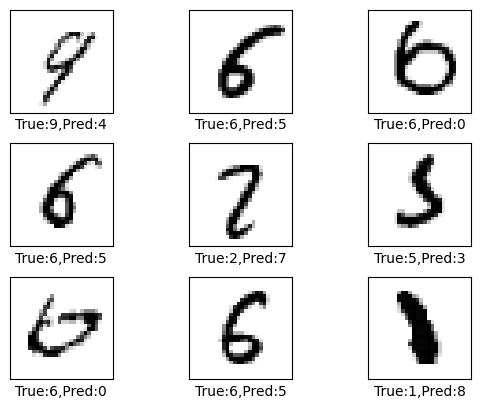

In [21]:
plot_images(x_test[misclassified_indices[0:9]],y_test[misclassified_indices[0:9]],cls_pred[misclassified_indices[0:9]])

Now, we calculate the accuracy of the model.

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0516 - accuracy: 0.9843


[0.05163636431097984, 0.9843000173568726]

We see our model has performed pretty well with around 98% accuracy.

This completes the project. Awaiting for everyone's feedback!

# Thank You !

> -Sanjana Bhakat



